In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
p_cancer = np.load('p_cancer_trial1.npy')

In [14]:
gammas = np.linspace(0, 18, 5)
# Ks = 

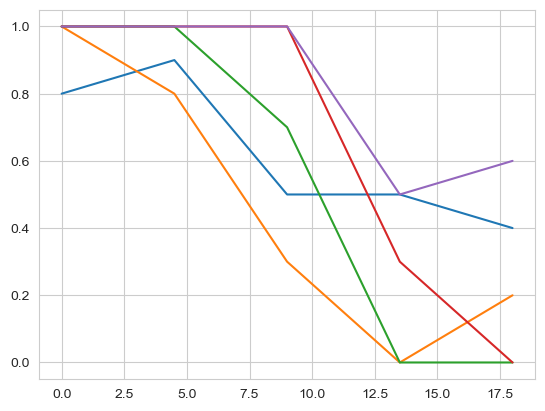

In [15]:
plt.plot(gammas, p_cancer.mean(-1))